In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
daily_df = pd.read_csv('hot_prevalence_estimation_2022.csv')
daily_df.index = daily_df.date
daily_df.index = pd.to_datetime(daily_df.index)

In [3]:
daily_df.shape


(365, 16)

In [4]:
daily_df.head(5)

,date,reddit_num_comment_list,reddit_hate_list,reddit_offensive_list,reddit_toxic_list,reddit_hot_list,twitter_num_comment_list,twitter_hate_list,twitter_offensive_list,twitter_toxic_list,twitter_hot_list,youtube_num_comment_list,youtube_hate_list,youtube_offensive_list,youtube_toxic_list,youtube_hot_list
date,,,,,,,,,,,,,,,,
2022-01-01,2022-01-01,911,70.576274,125.011698,124.343455,194.915071,853,66.336342,117.744531,117.104822,184.607954,814,62.419354,108.529220,109.282197,178.594677
2022-01-02,2022-01-02,10513,883.302789,1632.346653,1596.787678,2465.512305,9957,802.616764,1446.212300,1429.889899,2239.410282,4149,369.826749,709.276497,687.512444,1105.779345
2022-01-03,2022-01-03,5518,437.690644,780.934849,774.041458,1199.904517,5142,402.318726,712.588041,709.022369,1113.615615,3178,260.847226,479.139499,470.851544,746.399221
2022-01-04,2022-01-04,5914,468.703903,842.264502,832.202030,1291.672756,5355,431.266680,778.355532,768.623096,1197.202337,4613,374.738053,681.820355,672.877125,1073.836461
2022-01-05,2022-01-05,5571,422.295404,732.355911,734.596975,1152.130644,5254,420.684767,753.208979,747.077661,1178.107848,4735,402.490030,754.536740,737.952108,1203.786980


In [5]:
color_dict = {'reddit': '#FF5700',
              'twitter': '#00acee',
              'youtube': '#FF0000'}

In [6]:

def visualize_time_series(data_df):
    fig, axes = plt.subplots(4, 1, figsize=(12, 8), sharey=True)

    platform_list = ['reddit', 'twitter', 'youtube']
    metric_list = ['hot', 'hate', 'offensive', 'toxic']
    for ax_idx, metric in enumerate(metric_list):
        for platform in platform_list:
            color = color_dict[platform]

            axes[ax_idx].plot_date(
                data_df.index, 
                eval(f'data_df.{platform}_{metric}_list') / eval(f'data_df.{platform}_num_comment_list') * 100, 
                '-o', color=color, mfc='none', ms=2, label=platform)
            axes[ax_idx].set_title(metric, fontsize=16)

    for ax in axes.ravel():
        # ax.legend(frameon=False, fontsize=14)
        ax.set_ylabel('prevalence', fontsize=16)
        ax.tick_params(axis='both', which='major', labelsize=14)
        ax.spines['right'].set_visible(False)
        ax.spines['top'].set_visible(False)

    plt.tight_layout()

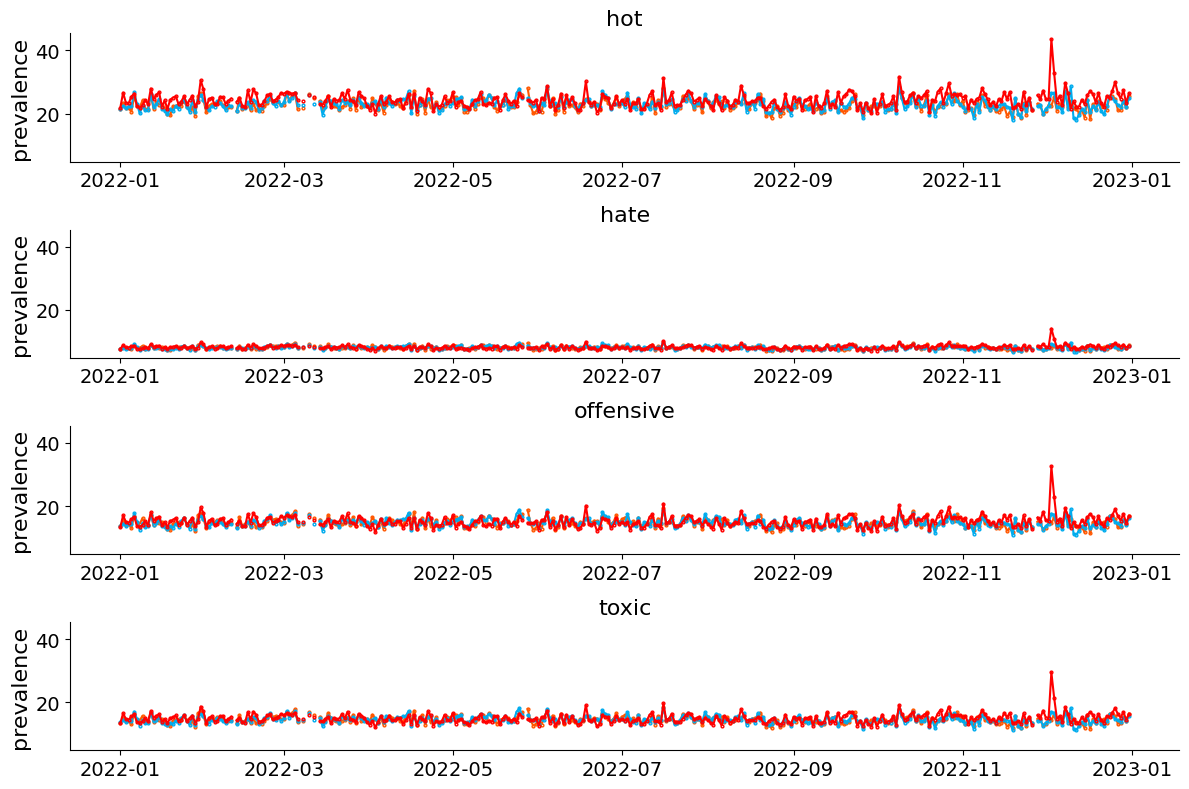

In [7]:
visualize_time_series(daily_df)

## Group by week

In [8]:
weekly_df = daily_df.resample('W-Mon').sum().reset_index()

In [9]:
weekly_df.head(5)

,date,reddit_num_comment_list,reddit_hate_list,reddit_offensive_list,reddit_toxic_list,reddit_hot_list,twitter_num_comment_list,twitter_hate_list,twitter_offensive_list,twitter_toxic_list,twitter_hot_list,youtube_num_comment_list,youtube_hate_list,youtube_offensive_list,youtube_toxic_list,youtube_hot_list
0,2022-01-03,16942,1391.569707,2538.293200,2495.172591,3860.331893,15952,1271.271832,2276.544873,2256.017090,3537.633851,8141,693.093330,1296.945216,1267.646186,2030.773243
1,2022-01-10,30630,2472.291608,4456.959245,4401.413745,6834.475892,28503,2315.608980,4186.649616,4133.905545,6464.140293,23367,1913.618540,3506.380354,3456.052413,5598.318134
2,2022-01-17,55113,4522.962254,8248.575164,8109.950810,12582.718010,52349,4255.058907,7728.024859,7617.860091,11961.170133,37528,3162.000232,5914.230344,5785.447650,9400.682318
3,2022-01-24,37347,2975.383907,5312.771012,5263.530179,8129.546475,34929,2769.706717,4926.911137,4890.916019,7600.136135,30678,2509.771518,4596.031149,4528.091529,7289.236716
4,2022-01-31,23976,1982.275537,3611.459373,3553.721467,5512.634571,22484,1852.914771,3389.246541,3333.057214,5240.118612,18178,1543.063595,2912.942268,2838.507894,4609.820789


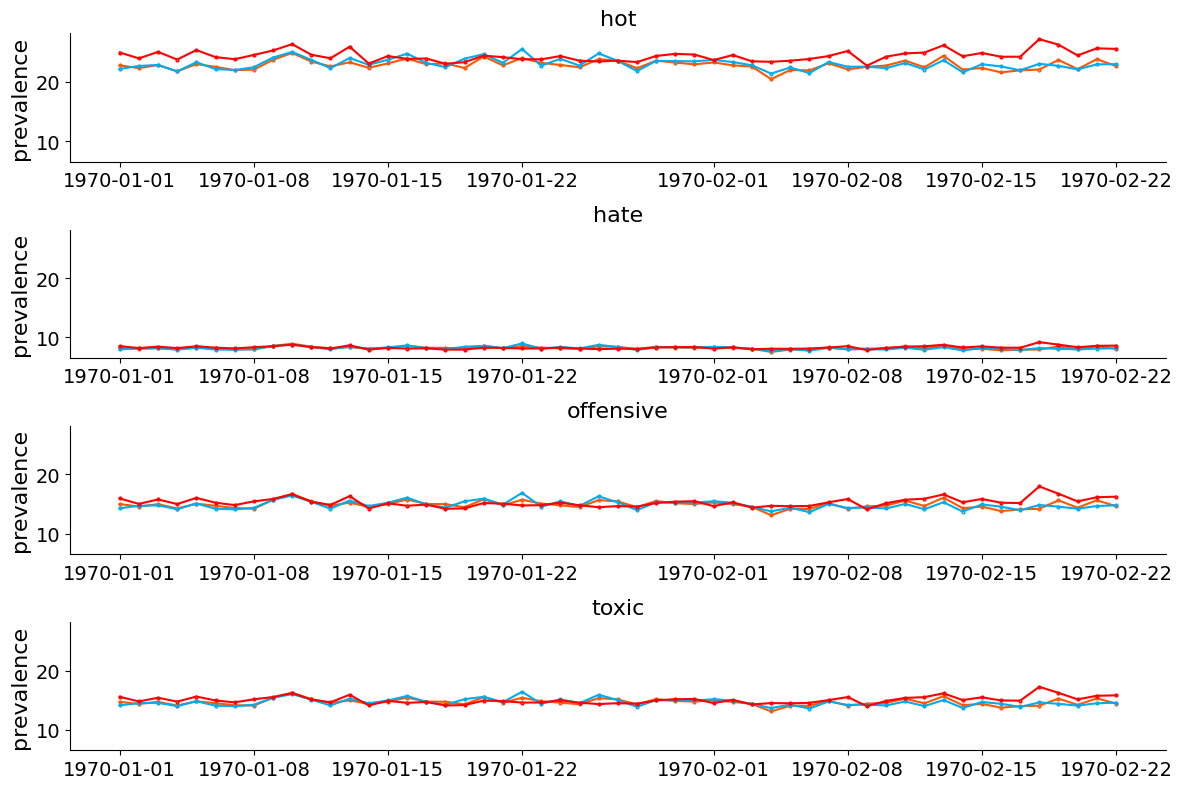

In [10]:
visualize_time_series(weekly_df)